## Question #1 (50 points)

***This question consists of plotting and a conceptual question. Pull code from homework and midterms to optimize your effort.***

For the following potential energy for anharmonically coupled oscillators, create a figure that superimposes

* a contour plot of the potential energy, and;
* the trajectory of $Q_1$ and $Q_2$.

### Point breakdown

* Contour plot (20 points)
* Trajectory plot (20 points)
* Physical explanation (10 points)


### The potential energy

$$ \Delta U = \frac{1}{2} K_1 Q_1^2 + \frac{1}{2} K_2 Q_2^2 + \frac{1}{3} C Q_1 Q_2^2 $$

### Constrained parameters and initial conditions

Take $K_1 = 1$, $K_2 = 0.2$, $M_1 = M_2 = 1$, and $C=0.5$. For the initial conditions, take $Q_1(0) = 0$, $Q_2(0) = 1$, and both velocities starting at zero.

### Plotting constraints
Plot $Q_1$ and $Q_2$ on the horizontal and vertical axes, respectively. I suggest a meshgrid of at least $100 \times 100$ points.

For your contour plot, combine `plt.contour` and `plt.contourf` with code similar to the following:

* `plt.contourf(Q1_grid, Q2_grid, U_grid, levels=50, cmap='viridis')`
* `plt.contour(Q1_grid, Q2_grid, U_grid, levels=50, colors='white', linewidths=1)`

Also, use `plt.xlim(-1.5, 1.5)` and `plt.ylim(-1.5, 1.5)`

Don't forget to label your axes.


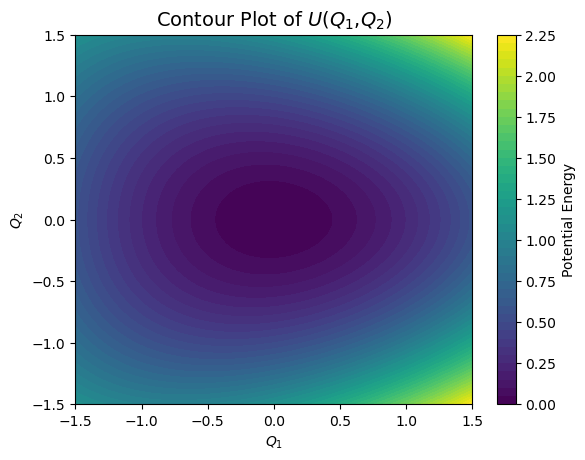

In [3]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define the potential energy
def potential_energy(Q1, Q2, K1=1.0, K2=0.2, C=0.5):
    return (1/2) * K1 * Q1**2 + (1/2) * K2 * Q2**2 + (1/3) * C * Q1 * Q2**2

# Define meshes in Q1 and Q2 and meshgrid for plotting
q1 = np.linspace(-1.5, 1.5, 100)
q2 = q1
Q1, Q2 = np.meshgrid(q1, q2)

# Plot contours
contourf = plt.contourf(Q1, Q2, potential_energy(Q1, Q2, K1=0.5, K2=1, C=0.5), levels=50, cmap='viridis')

cbar = plt.colorbar(contourf)  # Add a color bar
cbar.set_label('Potential Energy') # Label for color bar

plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.title('Contour Plot of $U$($Q_1$,$Q_2$)', fontsize=14)
plt.xlabel('$Q_1$')
plt.ylabel('$Q_2$')

plt.show()

### Getting and plotting the trajectory

To get the trajectory, you will need to set up and solve the equations of motion, as we did in previous homework and in class. Then you can plot $Q_2$ versus $Q_1$ with `matplotlib` using a line of code similar to `plt.plot(Q1, Q2, color='red', label="Trajectory")`.

Plot the trajectory from $t=0$ to $t=50$, with an appropriate choice of mesh points to ensure the trajectory is resolved. (e.g. `t_mesh = np.linspace(0, 50, 200)`)


$$ \Delta U = \frac{1}{2} K_1 Q_1^2 + \frac{1}{2} K_2 Q_2^2 + \frac{1}{3} C Q_1 Q_2^2 $$
$$F_{Q_1} = -\frac{\delta \Delta U}{\delta Q_1} = - (K_1 Q_1 + \frac{1}{3} C Q_2^2)$$
$$F_{Q_2} = -\frac{\delta \Delta U}{\delta Q_2} = - (K_2 Q_2 + \frac{2}{3} C Q_1 Q_2)$$

$ M_1 \frac{d^2 U}{d Q_1^2} = - (K_1 Q_1 + \frac{1}{3} C Q_2^2)$  
$ \rightarrow \frac{d^2 U}{d Q_1^2} = - (K_1 Q_1 + \frac{1}{3} C Q_2^2)$  

$ M_2 \frac{d^2 U}{d Q_2^2} = - (K_2 Q_2 + \frac{2}{3} C Q_1 Q_2)$  
$ \rightarrow \frac{d^2 U}{d Q_2^2} = - (K_2 Q_2 + \frac{2}{3} C Q_1 Q_2)$  

$ \dot{Q_1} = V_1$  
$ \dot{V_1} = - (K_1 Q_1 + \frac{1}{3} C Q_2^2)$

$ \dot{Q_2} = V_2$  
$ \dot{V_2} = - (K_2 Q_2 + \frac{2}{3} C Q_1 Q_2)$

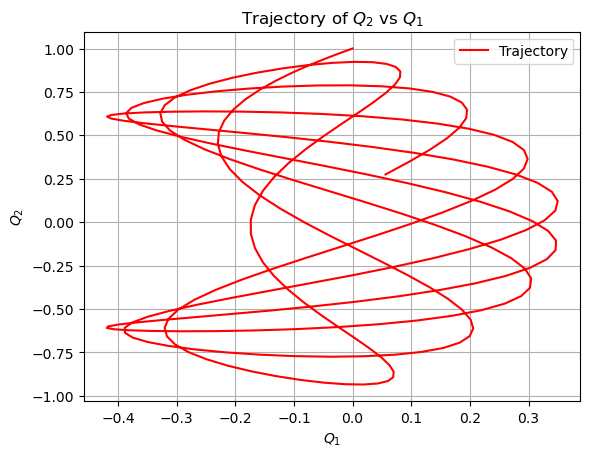

In [1]:
# Import necessary libraries
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the system of equations
def anharmonic_oscillator(t, y):
    Q1, V1, Q2, V2 = y
    dQ1dt = V1
    dV1dt = -(K1 * Q1 + (1/3) * C * Q2**2)
    dQ2dt = V2
    dV2dt = -(K2 * Q2 + (2/3) * C * Q1 * Q2)
    return [dQ1dt, dV1dt, dQ2dt, dV2dt]

# Define the parameters
K1 = 1.0
K2 = 0.2
C = 0.5

# Initial conditions
y0 = [0.0, 0.0, 1.0, 0.0] # [Q1(0), V1(0), Q2(0), V2(0)]

# Time mesh
t_span = (0, 50)
t_eval = np.linspace(0, 50, 250)

# Solve the system
solution = solve_ivp(anharmonic_oscillator, t_span, y0, t_eval=t_eval)

# Extract solutions
Q1 = solution.y[0]
Q2 = solution.y[2]

# Plot the trajectory
plt.plot(Q1, Q2, color='red', label="Trajectory")
plt.xlabel('$Q_1$')
plt.ylabel('$Q_2$')
plt.title('Trajectory of $Q_2$ vs $Q_1$')
plt.legend()
plt.grid(True)
plt.show()

### Contour plot with superimposed trajectory plot

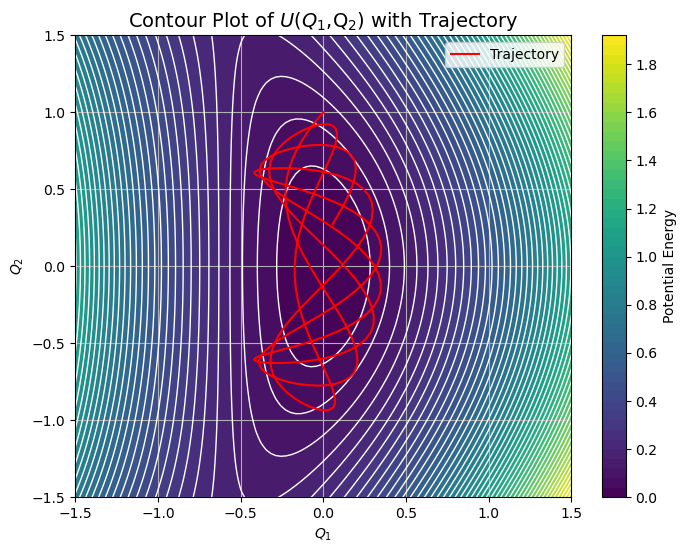

In [5]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the potential energy
def potential_energy(Q1, Q2, K1=1.0, K2=0.2, C=0.5):
    return (1/2) * K1 * Q1**2 + (1/2) * K2 * Q2**2 + (1/3) * C * Q1 * Q2**2

# Define the system of equations
def anharmonic_oscillator(t, y, K1, K2, C):
    Q1, V1, Q2, V2 = y
    dQ1dt = V1
    dV1dt = -(K1 * Q1 + (1/3) * C * Q22)
    dQ2dt = V2
    dV2dt = -(K2 * Q2 + (2/3) * C * Q1 * Q2)
    return [dQ1dt, dV1dt, dQ2dt, dV2dt]

    # Define the parameters
    K1 = 1.0
    K2 = 0.2
    C = 0.5
    
    # Initial conditions
    y0 = [0.0, 0.0, 1.0, 0.0] # [Q1(0), V1(0), Q2(0), V2(0)]
    
    # Time mesh
    t_span = (0, 50)
    t_eval = np.linspace(0, 50, 250)
    
    # Solve the system
    solution = solve_ivp(anharmonic_oscillator, t_span, y0, t_eval=t_eval, args=(K1, K2, C))
    
# Extract solutions
Q1_traj = solution.y[0]
Q2_traj = solution.y[2]

# Define meshes in Q1 and Q2 and meshgrid for plotting
q1 = np.linspace(-1.5, 1.5, 100)
q2 = q1
Q1, Q2 = np.meshgrid(q1, q2)

# Plot contours
plt.figure(figsize=(8, 6))
contourf = plt.contourf(Q1, Q2, potential_energy(Q1, Q2, K1, K2, C), levels=50, cmap='viridis')
plt.contour(Q1, Q2, potential_energy(Q1, Q2, K1, K2, C), levels=50, colors='white', linewidths=1)

# Add a color bar
cbar = plt.colorbar(contourf)
cbar.set_label('Potential Energy')

# Plot the trajectory
plt.plot(Q1_traj, Q2_traj, color='red', label="Trajectory")

# Set plot limits and labels
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.title('Contour Plot of $U$($Q_1$,Q$_2)$ with Trajectory', fontsize=14)
plt.xlabel('$Q_1$')
plt.ylabel('$Q_2$')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

### Physical explanation

With your code complete, you can test four cases for the initial conditions (all with the initial velocity set to zero):

1. $Q_1(0) = 0$, $Q_2(0) = 1$ (**submit this plot**)
2. $Q_1(0) = 0$, $Q_2(0) = -1$
3. $Q_1(0) = 1$, $Q_2(0) = 0$
4. $Q_1(0) = -1$, $Q_2(0) = 0$


### Testing the four cases

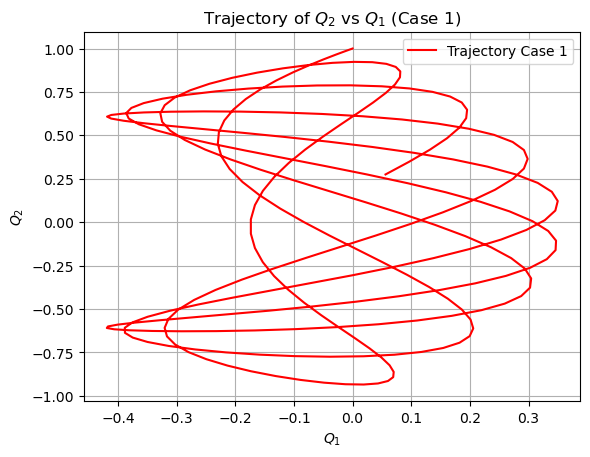

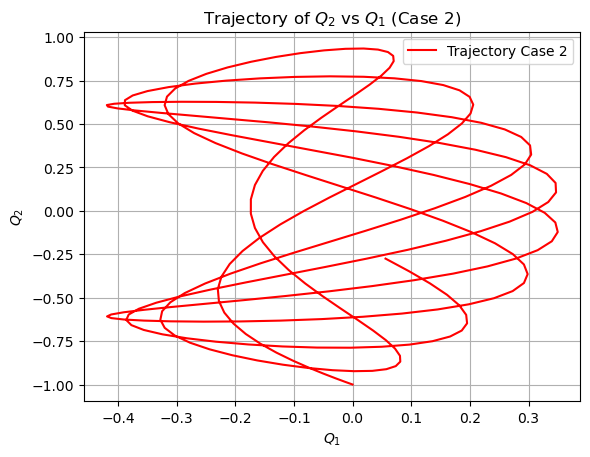

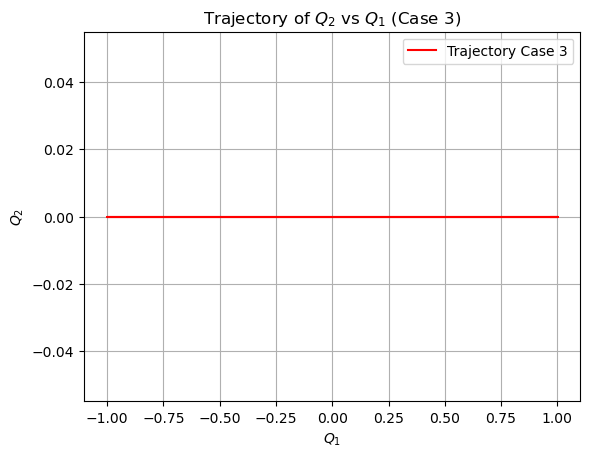

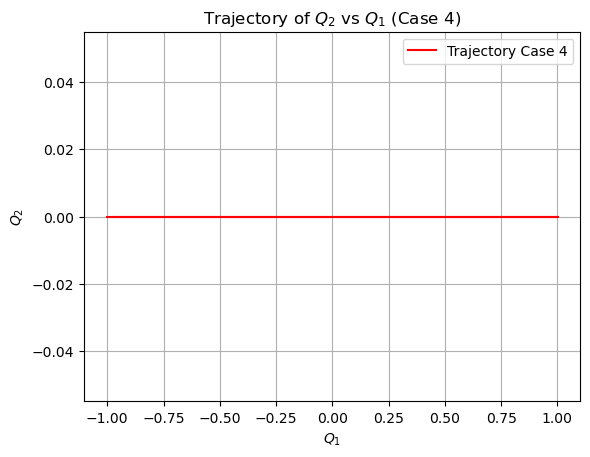

In [6]:
# Import necessary libraries
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the system of equations
def anharmonic_oscillator(t, y):
    Q1, V1, Q2, V2 = y
    dQ1dt = V1
    dV1dt = -(K1 * Q1 + (1/3) * C * Q2**2)
    dQ2dt = V2
    dV2dt = -(K2 * Q2 + (2/3) * C * Q1 * Q2)
    return [dQ1dt, dV1dt, dQ2dt, dV2dt]

# Define the parameters
K1 = 1.0
K2 = 0.2
C = 0.5

# Time mesh
t_span = (0, 50)
t_eval = np.linspace(0, 50, 250)

# Initial conditions for each case
initial_conditions = [
[0, 0, 1, 0], # Case 1: Q1(0) = 0, Q2(0) = 1
[0, 0, -1, 0], # Case 2: Q1(0) = 0, Q2(0) = -1
[1, 0, 0, 0], # Case 3: Q1(0) = 1, Q2(0) = 0
[-1, 0, 0, 0] # Case 4: Q1(0) = -1, Q2(0) = 0
]

# Plot each case
for i, y0 in enumerate(initial_conditions, start=1):
    # Solve the system
    solution = solve_ivp(anharmonic_oscillator, t_span, y0, t_eval=t_eval)


    # Extract solutions
    Q1 = solution.y[0]
    Q2 = solution.y[2]
    
    # Plot the trajectory
    plt.figure()
    plt.plot(Q1, Q2, color='red', label=f"Trajectory Case {i}")
    plt.xlabel('$Q_1$')
    plt.ylabel('$Q_2$')
    plt.title(f'Trajectory of $Q_2$ vs $Q_1$ (Case {i})')
    plt.legend()
    plt.grid(True)
    plt.show()

Why do the dynamics differ when only $Q_1$ is initially displaced compared to when only $Q_2$ is initially displaced?  

When only $Q_1$is initially displaced, the dynamics of the system are influenced by the potential energy associated with $Q_1$ and the coupling term. When only $Q_2$is initially displaced, the dynamics of the system are influenced by the potential energy associated with $Q_2$ and the coupling term.

How does this relate to the coupling term in the potential energy?  

The coupling term in the potential energy is $\frac{1}{3} C Q_1 Q_2^2$. This term shows that there is an interaction between $Q_1$ and $Q_2$. Therefore, the displacement of one can affect the dynamics of the other. The coupling term contributes to the forces acting on both $Q_1$ and $Q_2$. The displacement of $Q_1$ affects the motion of $Q_2$ and vice versa. 

What is the physical interpretation? You could use our cylindrical beam example from class to describe this, if you like.  

A cylindrical beam that can bend and twist: The bending and twisting are analogous to the displacements $Q_1$ and $Q_2$ in this system. The beam's material properties and geometry determine how it responds to forces, similar to how the constants $K_1$, $K_2$, and $C$ affect the dynamics of $Q_1$ and $Q_2$. When the beam bends, it can also twist due to the material's physical properties or their geometric constraints.
